# Modelo de Regresión Lineal General

Para ver una referencia historica del metodo de Regresión lineal se puede acceder al siguiente link [Modelo Regresión Lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal#:~:text=En%20estad%C3%ADstica%20la%20regresi%C3%B3n%20lineal%20o%20ajuste%20lineal,{displaystyle%20Y_%20{t}=beta%20_%20{0}+beta%20_%20{1}X_) 


Suponga que se tiene una variable respuesta $Y$ que se desea explicar por una serie de covariables $X_1,X_2.X_3,...,X_p$,,mediante la siguiente relación funcional:

$$
Y_i=\beta_0+\beta_1X_{1i}+\beta_2X_{2i}+...+\beta_pX_{pi}+ \epsilon  
$$

Donde $\epsilon_i$ es una muestra aleatoria indepediente e identicamente distribuidas, con cada  $ \epsilon_1 \sim N(0,\sigma^2)$.


## Metodo de estimación (Minimos Cuadrados Ordinarios)

Se tiene el siguiente modelo 

$$
Y=X\beta+\epsilon  \quad  \quad \quad \epsilon \sim N_p(0,\sigma^2I)
$$

De aqui se tiene que 

$$
\epsilon=Y-X\beta
$$

Luego se desea encontrar los coheficientes $\beta$ que minimizen la siguiente expresión:

$$
\epsilon'\epsilon=(Y-X\beta)'(Y-X\beta)=Y'Y-\beta'X'Y-Y'X\beta+\beta'X'X\beta
$$

Derivando e igualando a 0 se obtiene que el vector $\beta$ que minimiza la anterior expresión es 

$$
\hat\beta=(X'X)^{-1}X'Y
$$

El cual coincide con el estimador maximoverosimil utilizando la teoria asociada a la normal.

A manera de ejemplo se realizara una aplicacion basica de como se calcula este estimador utilizando comandos en python, utilizando los datos de boston de la libreria sklearn:

# Cargar la información

In [1]:
import pandas as pd ### libreria para manejar tablas en Python
import numpy  as np #### libreria para manejar arrays en Python
import matplotlib.pyplot as plt  ##Libreria para hacer Graficos en Python 
from sklearn import datasets, linear_model, metrics

boston = datasets.load_boston(return_X_y=False)

X = pd.DataFrame(boston.data)
y = pd.DataFrame(boston.target)

X.columns=boston.feature_names
y.colums=  'MEDV'


# Analisis Gráfico.

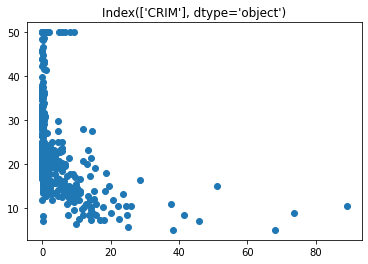

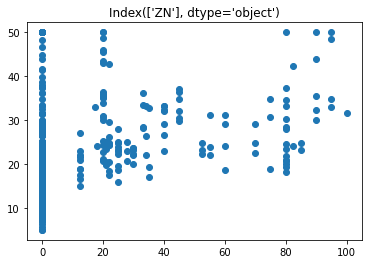

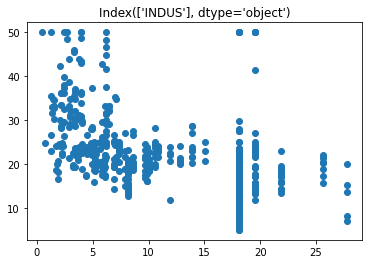

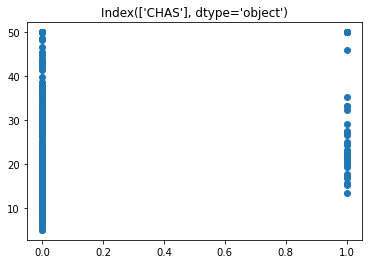

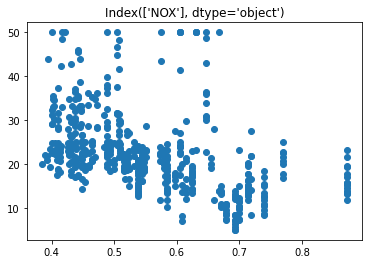

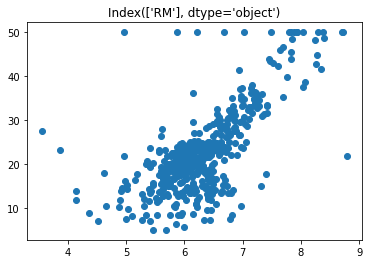

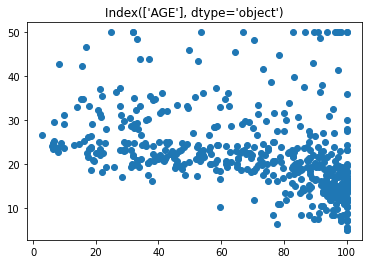

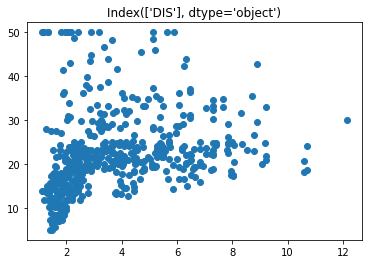

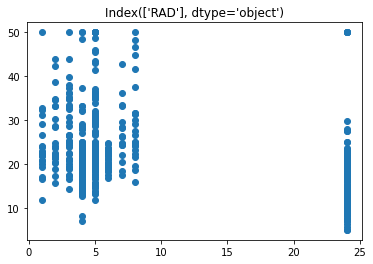

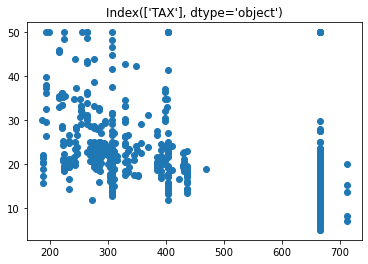

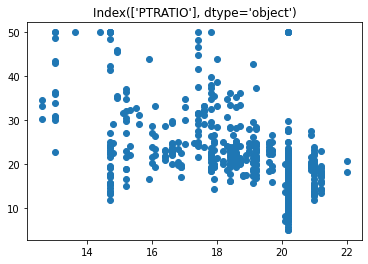

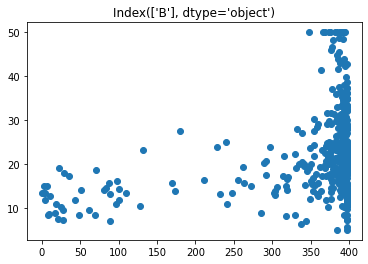

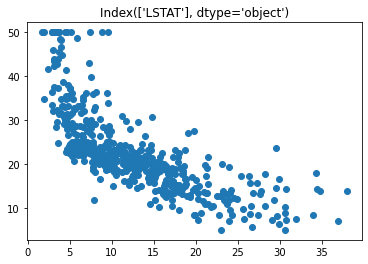

In [2]:
for i in range(len(X.iloc[1,:])):
    s=X.iloc[:,i]
    plt.plot(s,np.array(y),'o')
    plt.title(X.iloc[:,i:i+1].columns)
    plt.show()

### Separación de la muestra de entrenamiento y prueba

In [3]:
#####  Separación de la muestras de entrenamiento prueba para realizar el modelo.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

# Entrenamiento del modelo lineal, Estimación de parámetros.

In [4]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

linearModel=LinearRegression()
linearModel.fit(X_train, y_train) 
linearModel.coef_


array([[-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,
         2.18579583e+00, -1.72053975e+01,  3.63606995e+00,
         2.05579939e-03, -1.36602886e+00,  2.89576718e-01,
        -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
        -5.04008320e-01]])

# Calidad del Ajuste, $R^2$ 


Se sabe que la suma de cuadrados total dada por la variable respuesta asociada al modelo lineal se puede descomponer de la siguiente forma:

$$
Y'Y=Y'P_XY+Y'(I-P_x)Y
$$

Donde $Y'Y$, $Y'P_XY$, $Y'(I-P_x)Y$ , Se conoce como la suma de cuadrados total, suma de cuadrados del modelo y suma de cuadrados del residual, con $P_x=X(X'X)X'$

Con base en lo anterior, una medida que me permite evaluar la calidad del ajuste es el $R^2$, el cual me indica que porcentaje de la variabilidad esta explicando el modelo sobre mi caracteristica de interes, esta cantidad se determina de la siguiente forma:

$$
R^2=\frac{Y'P_XY}{Y'Y}
$$

Donde $R^2$ es un número entre 0 y 1. Esta cantidad en python se cálcula de la siguiente forma:


In [5]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linearModel.predict(X_train)

print('El R^2 para este modelo es: %.2f' %(r2_score(y_train,y_pred)*100) ,'%')


El R^2 para este modelo es: 74.68 %


# Calidad del Ajuste Muestra de Entrenamiento.

Por lo general se desea saber que tan bueno es el ajuste con respecto a nueva muestra no considerada durante la estimación del modelo, para evaluar la calidad de las predicciones del  mismo. 

Si las metricas como $R^2$, es parecido al que se obtubo en lo visto anteriormente,este nos indica que el modelo realiza predicciones consistentes con respecto a lo planteado en el entrenamiento.

Esta Metrica en python se cálcula de la siguiente forma:

In [6]:
y_pred_test = linearModel.predict(X_test)

print('El R^2 para este modelo es: %.2f' %(r2_score(y_test,y_pred_test)*100) ,'%')


El R^2 para este modelo es: 72.09 %
